In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Loading Data

In [2]:
data= pd.read_csv('Mall_Customers.csv')

In [3]:
data.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [5]:
data.tail(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.shape

(200, 5)

In [74]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [76]:
import seaborn as sns

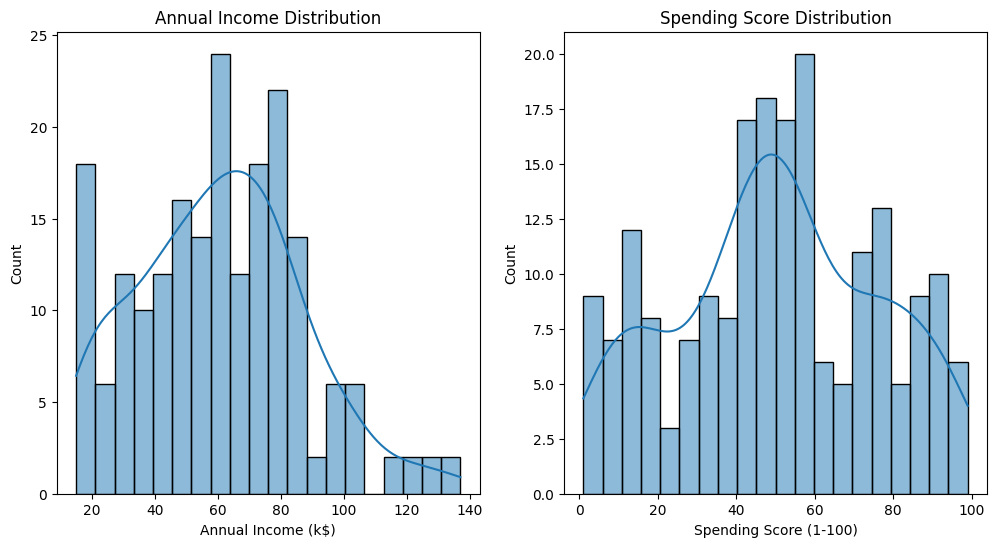

In [78]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

Data Preprocessing

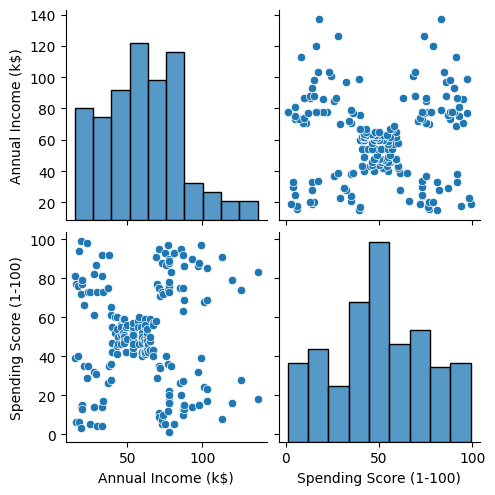

In [101]:
xd=data[['Annual Income (k$)','Spending Score (1-100)']]
sns.pairplot(xd)

Applying K-means Clustering

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [102]:
scler= StandardScaler()
xScale= scler.fit_transform(xd)

In [103]:
inrtia= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=42)
    kmeans.fit(xScale)
    inrtia.append(kmeans.inertia_)

Using Elbow Method

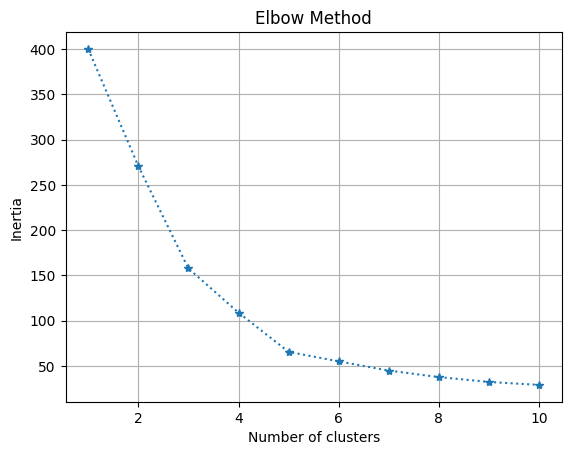

In [104]:
plt.plot(range(1,11), inrtia,linestyle='dotted', marker="*")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [105]:
Kmeans= KMeans(n_clusters=5, init='k-means++',max_iter=300, n_init=10, random_state=42)
data['Cluster']= Kmeans.fit_predict(xScale)

Visualizing Clusters

a. Scatter Plot

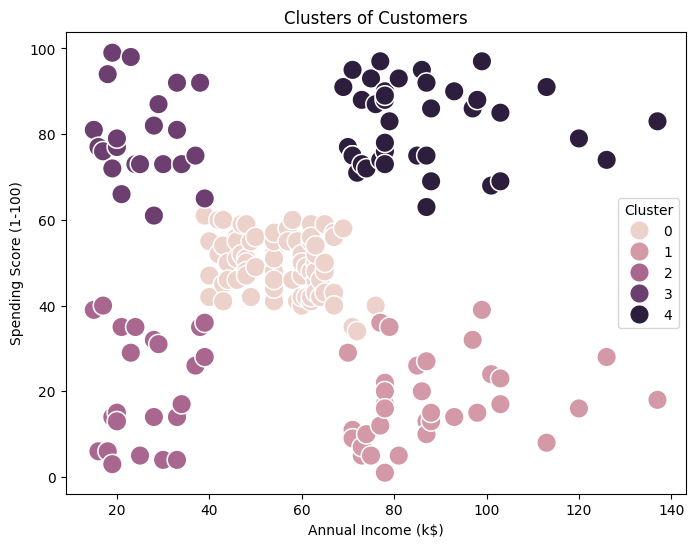

In [111]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Cluster', s=200)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


b. Boxplot

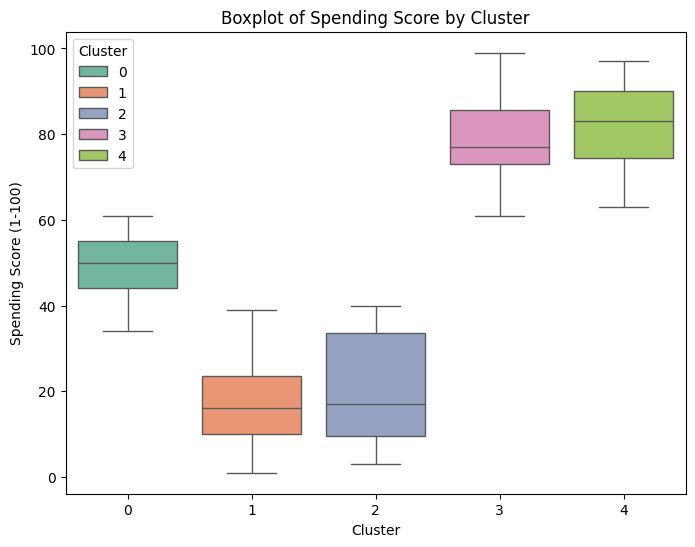

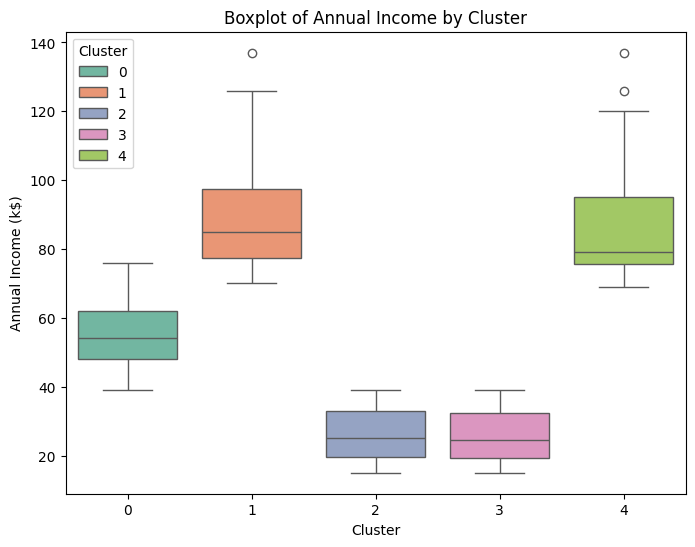

In [120]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="Cluster",
    y="Spending Score (1-100)",
    data=data,
    palette="Set2",
    hue='Cluster'
)
plt.xlabel("Cluster")
plt.ylabel("Spending Score (1-100)")
plt.title("Boxplot of Spending Score by Cluster")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(
    x="Cluster",
    y="Annual Income (k$)",
    data=data,
    palette="Set2",
    hue='Cluster'
)
plt.xlabel("Cluster")
plt.ylabel("Annual Income (k$)")
plt.title("Boxplot of Annual Income by Cluster")
plt.show()
